In [1]:
# Import Dependencies
import pandas as pd
import numpy
from collections import Counter
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [2]:
all_prices_df = pd.read_csv('./Resources/all_prices.csv')
all_prices_df

,year_month,geography,timeframe,date,type,avg_price,total_volume,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags
0,1/1/2017,Albany,Weekly,1/2/2017,conventional,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00
1,1/1/2017,Atlanta,Weekly,1/2/2017,conventional,0.93,547565.88,224073.54,118926.37,337.48,204228.49,111599.58,92628.91,0.00
2,1/1/2017,Baltimore/Washington,Weekly,1/2/2017,conventional,1.47,631760.81,54530.42,408952.26,14387.01,153891.12,151345.59,2542.41,3.12
3,1/1/2017,Boise,Weekly,1/2/2017,conventional,0.92,104510.11,27845.16,9408.92,11341.75,55914.28,53093.47,2793.61,27.20
4,1/1/2017,Boston,Weekly,1/2/2017,conventional,1.29,458830.49,4119.90,371223.34,3933.72,79553.53,79339.78,213.75,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20405,9/1/2020,Syracuse,Weekly,9/6/2020,organic,1.47,4599.68,263.28,151.82,0.00,4184.58,3676.17,508.41,0.00
20406,9/1/2020,Tampa,Weekly,9/6/2020,organic,1.63,4981.81,115.22,0.00,0.00,4866.59,3427.70,1438.89,0.00
20407,9/1/2020,Total U.S.,Weekly,9/6/2020,organic,1.62,1754057.30,105106.37,144137.69,4186.01,1500627.23,848427.68,652190.75,8.80
20408,9/1/2020,West,Weekly,9/6/2020,organic,1.58,315771.42,31032.50,28880.42,1192.43,254666.07,100807.93,153849.34,8.80


In [3]:
all_prices_df.dtypes

year_month       object
geography        object
timeframe        object
date             object
type             object
avg_price       float64
total_volume    float64
4046_units      float64
4225_units      float64
4770_units      float64
total_bags      float64
s_bags          float64
l_bags          float64
xl_bags         float64
dtype: object

In [4]:
all_prices_df["date"] = pd.to_datetime(all_prices_df["date"])
all_prices_df['year'] = all_prices_df['date'].dt.year
all_prices_df['month'] = all_prices_df['date'].dt.month
all_prices_df['day'] = all_prices_df['date'].dt.day
#all_prices_df

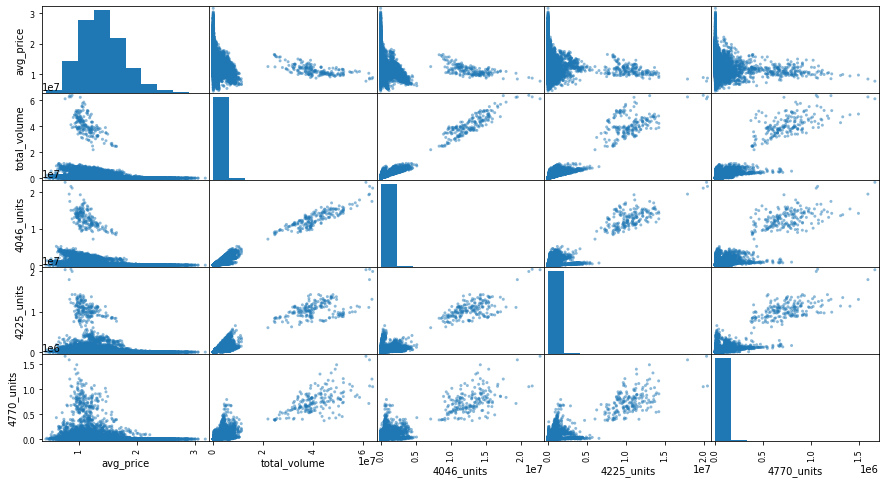

In [5]:
#EDA with scatter matrix
pd.plotting.scatter_matrix(all_prices_df.iloc[:,4:10], figsize=(15,8));

In [6]:
# Drop the non-beneficial columns, 'status' and 'prod'.
all_prices_df.drop(['year_month', 'timeframe', 'date', 'total_volume'],axis=1, inplace=True)
all_prices_df

,geography,type,avg_price,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags,year,month,day
0,Albany,conventional,1.47,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,2017,1,2
1,Atlanta,conventional,0.93,224073.54,118926.37,337.48,204228.49,111599.58,92628.91,0.00,2017,1,2
2,Baltimore/Washington,conventional,1.47,54530.42,408952.26,14387.01,153891.12,151345.59,2542.41,3.12,2017,1,2
3,Boise,conventional,0.92,27845.16,9408.92,11341.75,55914.28,53093.47,2793.61,27.20,2017,1,2
4,Boston,conventional,1.29,4119.90,371223.34,3933.72,79553.53,79339.78,213.75,0.00,2017,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20405,Syracuse,organic,1.47,263.28,151.82,0.00,4184.58,3676.17,508.41,0.00,2020,9,6
20406,Tampa,organic,1.63,115.22,0.00,0.00,4866.59,3427.70,1438.89,0.00,2020,9,6
20407,Total U.S.,organic,1.62,105106.37,144137.69,4186.01,1500627.23,848427.68,652190.75,8.80,2020,9,6
20408,West,organic,1.58,31032.50,28880.42,1192.43,254666.07,100807.93,153849.34,8.80,2020,9,6


In [7]:
# Remove rows that have at least 1 null value.
for column in all_prices_df.columns:
        print(f"Column {column}) has {all_prices_df[column].isnull().sum()} null values")

Column geography) has 0 null values
Column type) has 0 null values
Column avg_price) has 0 null values
Column 4046_units) has 0 null values
Column 4225_units) has 0 null values
Column 4770_units) has 0 null values
Column total_bags) has 0 null values
Column s_bags) has 0 null values
Column l_bags) has 0 null values
Column xl_bags) has 0 null values
Column year) has 0 null values
Column month) has 0 null values
Column day) has 0 null values


In [8]:
# all_prices_df= all_prices_df.dropna(subset = ['avg_price'])
all_prices_df = all_prices_df.dropna()
#all_prices_df

In [9]:
all_prices_df

,geography,type,avg_price,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags,year,month,day
0,Albany,conventional,1.47,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,2017,1,2
1,Atlanta,conventional,0.93,224073.54,118926.37,337.48,204228.49,111599.58,92628.91,0.00,2017,1,2
2,Baltimore/Washington,conventional,1.47,54530.42,408952.26,14387.01,153891.12,151345.59,2542.41,3.12,2017,1,2
3,Boise,conventional,0.92,27845.16,9408.92,11341.75,55914.28,53093.47,2793.61,27.20,2017,1,2
4,Boston,conventional,1.29,4119.90,371223.34,3933.72,79553.53,79339.78,213.75,0.00,2017,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20405,Syracuse,organic,1.47,263.28,151.82,0.00,4184.58,3676.17,508.41,0.00,2020,9,6
20406,Tampa,organic,1.63,115.22,0.00,0.00,4866.59,3427.70,1438.89,0.00,2020,9,6
20407,Total U.S.,organic,1.62,105106.37,144137.69,4186.01,1500627.23,848427.68,652190.75,8.80,2020,9,6
20408,West,organic,1.58,31032.50,28880.42,1192.43,254666.07,100807.93,153849.34,8.80,2020,9,6


In [10]:
#all_prices_df.groupby('year').size()

In [11]:
#all_prices_df.groupby('month').size()

In [12]:
#all_prices_df.groupby('day').size()

In [13]:
# Determine the number of unique values in each column.
all_prices_cat = all_prices_df.dtypes[all_prices_df.dtypes == "object"].index.tolist()
all_prices_df[all_prices_cat].nunique()

geography    54
type          3
dtype: int64

In [14]:
# Why is there 2 "convential" types?
all_prices_df.groupby('type').size()

type
conventional      7182
conventional      3024
organic          10204
dtype: int64

In [15]:
all_prices_df.loc[all_prices_df['type'] == 'conventional ', 'type'] = 'conventional' 

In [16]:
all_prices_df.groupby('type').size()

type
conventional    10206
organic         10204
dtype: int64

In [17]:
# clean type to get 2 groups
all_prices_cat = all_prices_df.dtypes[all_prices_df.dtypes == "object"].index.tolist()
all_prices_df[all_prices_cat].nunique()

geography    54
type          2
dtype: int64

In [18]:
all_prices_cat = pd.get_dummies(data=all_prices_df, columns=['geography','type'])
all_prices_cat

,avg_price,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags,year,month,...,geography_Southeast,geography_Spokane,geography_St. Louis,geography_Syracuse,geography_Tampa,geography_Total U.S.,geography_West,geography_West Tex/New Mexico,type_conventional,type_organic
0,1.47,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,2017,1,...,0,0,0,0,0,0,0,0,1,0
1,0.93,224073.54,118926.37,337.48,204228.49,111599.58,92628.91,0.00,2017,1,...,0,0,0,0,0,0,0,0,1,0
2,1.47,54530.42,408952.26,14387.01,153891.12,151345.59,2542.41,3.12,2017,1,...,0,0,0,0,0,0,0,0,1,0
3,0.92,27845.16,9408.92,11341.75,55914.28,53093.47,2793.61,27.20,2017,1,...,0,0,0,0,0,0,0,0,1,0
4,1.29,4119.90,371223.34,3933.72,79553.53,79339.78,213.75,0.00,2017,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20405,1.47,263.28,151.82,0.00,4184.58,3676.17,508.41,0.00,2020,9,...,0,0,0,1,0,0,0,0,0,1
20406,1.63,115.22,0.00,0.00,4866.59,3427.70,1438.89,0.00,2020,9,...,0,0,0,0,1,0,0,0,0,1
20407,1.62,105106.37,144137.69,4186.01,1500627.23,848427.68,652190.75,8.80,2020,9,...,0,0,0,0,0,1,0,0,0,1
20408,1.58,31032.50,28880.42,1192.43,254666.07,100807.93,153849.34,8.80,2020,9,...,0,0,0,0,0,0,1,0,0,1


In [19]:
# Create our target
y = all_prices_cat.avg_price
y

# Create our features
X = all_prices_cat
X = X.drop("avg_price", axis=1)
X

,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags,year,month,day,...,geography_Southeast,geography_Spokane,geography_St. Louis,geography_Syracuse,geography_Tampa,geography_Total U.S.,geography_West,geography_West Tex/New Mexico,type_conventional,type_organic
0,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,2017,1,2,...,0,0,0,0,0,0,0,0,1,0
1,224073.54,118926.37,337.48,204228.49,111599.58,92628.91,0.00,2017,1,2,...,0,0,0,0,0,0,0,0,1,0
2,54530.42,408952.26,14387.01,153891.12,151345.59,2542.41,3.12,2017,1,2,...,0,0,0,0,0,0,0,0,1,0
3,27845.16,9408.92,11341.75,55914.28,53093.47,2793.61,27.20,2017,1,2,...,0,0,0,0,0,0,0,0,1,0
4,4119.90,371223.34,3933.72,79553.53,79339.78,213.75,0.00,2017,1,2,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20405,263.28,151.82,0.00,4184.58,3676.17,508.41,0.00,2020,9,6,...,0,0,0,1,0,0,0,0,0,1
20406,115.22,0.00,0.00,4866.59,3427.70,1438.89,0.00,2020,9,6,...,0,0,0,0,1,0,0,0,0,1
20407,105106.37,144137.69,4186.01,1500627.23,848427.68,652190.75,8.80,2020,9,6,...,0,0,0,0,0,1,0,0,0,1
20408,31032.50,28880.42,1192.43,254666.07,100807.93,153849.34,8.80,2020,9,6,...,0,0,0,0,0,0,1,0,0,1


In [20]:
y

0        1.47
1        0.93
2        1.47
3        0.92
4        1.29
         ... 
20405    1.47
20406    1.63
20407    1.62
20408    1.58
20409    1.56
Name: avg_price, Length: 20410, dtype: float64

In [21]:
X.columns.tolist()

['4046_units',
 '4225_units',
 '4770_units',
 'total_bags',
 's_bags',
 'l_bags',
 'xl_bags',
 'year',
 'month',
 'day',
 'geography_Albany',
 'geography_Atlanta',
 'geography_Baltimore/Washington',
 'geography_Boise',
 'geography_Boston',
 'geography_Buffalo/Rochester',
 'geography_California',
 'geography_Charlotte',
 'geography_Chicago',
 'geography_Cincinnati/Dayton',
 'geography_Columbus',
 'geography_Dallas/Ft. Worth',
 'geography_Denver',
 'geography_Detroit',
 'geography_Grand Rapids',
 'geography_Great Lakes',
 'geography_Harrisburg/Scranton',
 'geography_Hartford/Springfield',
 'geography_Houston',
 'geography_Indianapolis',
 'geography_Jacksonville',
 'geography_Las Vegas',
 'geography_Los Angeles',
 'geography_Louisville',
 'geography_Miami/Ft. Lauderdale',
 'geography_Midsouth',
 'geography_Nashville',
 'geography_New Orleans/Mobile',
 'geography_New York',
 'geography_Northeast',
 'geography_Northern New England',
 'geography_Orlando',
 'geography_Philadelphia',
 'geograp

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [23]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)


[1.46582706 1.60954398 1.52644582 ... 1.45478697 1.08969791 1.51789052]


In [24]:
print(y_pred.shape)
print(X_test.shape)

(5103,)
(5103, 66)


In [25]:
model.score(X_test, y_test)

0.5491849992919566

model score is 0.5498531561442728 with the following features: '4046_units',
 '4225_units',
 '4770_units',
 'total_bags',
 's_bags',
 'l_bags',
 'xl_bags',
 'year',
 'month',
 'day',
 'geography_Albany',
 'geography_Atlanta',
 'geography_Baltimore/Washington',
 'geography_Boise',
 'geography_Boston',
 'geography_Buffalo/Rochester',
 'geography_California',
 'geography_Charlotte',
 'geography_Chicago',
 'geography_Cincinnati/Dayton',
 'geography_Columbus',
 'geography_Dallas/Ft. Worth',
 'geography_Denver',
 'geography_Detroit',
 'geography_Grand Rapids',
 'geography_Great Lakes',
 'geography_Harrisburg/Scranton',
 'geography_Hartford/Springfield',
 'geography_Houston',
 'geography_Indianapolis',
 'geography_Jacksonville',
 'geography_Las Vegas',
 'geography_Los Angeles',
 'geography_Louisville',
 'geography_Miami/Ft. Lauderdale',
 'geography_Midsouth',
 'geography_Nashville',
 'geography_New Orleans/Mobile',
 'geography_New York',
 'geography_Northeast',
 'geography_Northern New England',
 'geography_Orlando',
 'geography_Philadelphia',
 'geography_Phoenix/Tucson',
 'geography_Pittsburgh',
 'geography_Plains',
 'geography_Portland',
 'geography_Raleigh/Greensboro',
 'geography_Richmond/Norfolk',
 'geography_Roanoke',
 'geography_Sacramento',
 'geography_San Diego',
 'geography_San Francisco',
 'geography_Seattle',
 'geography_South Carolina',
 'geography_South Central',
 'geography_Southeast',
 'geography_Spokane',
 'geography_St. Louis',
 'geography_Syracuse',
 'geography_Tampa',
 'geography_Total U.S.',
 'geography_West',
 'geography_West Tex/New Mexico',
 'type_conventional',
 'type_organic']

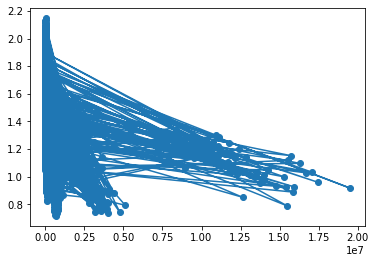

In [26]:
plt.scatter(X_test['4046_units'], y_pred)
plt.plot(X_test['4046_units'], y_pred)
plt.show()